In [22]:
from glob import glob
import xml.etree.ElementTree as ET

import json

import cv2

import matplotlib
matplotlib.use('agg')
%matplotlib inline
import matplotlib.pyplot as plt

import pickle

from time import time

/home/zoecarver/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [23]:
def find(lst, key, value):
    for i, dic in enumerate(lst):
        if dic[key] == value:
            return i
    return None


colors = [ # yeah I spent a lot of time picking colors :P
    (244, 134, 66),
    (66, 134, 244),
    (216, 216, 216),
    (0, 105, 211), 
    (0, 28, 55),
    (51, 87, 255),
    (218, 247, 166),
] * 100

def draw_boxes(image, boxes):
    height_scalar = 1 # multiply by height
    width_scalar = 1
        
    for box in boxes:
        xmin, xmax, ymin, ymax, objectness, classes = box
        xmin = int(xmin * width_scalar)
        xmax = int(xmax * width_scalar) 
        ymin = int(ymin * height_scalar) 
        ymax = int(ymax * height_scalar)
        
        main_class = 1
        
        font = cv2.FONT_HERSHEY_PLAIN
        image = cv2.rectangle(image, (xmin, ymin), (xmax, ymax), colors[main_class], 6)
                            
    return image  

In [24]:
with open('annotations/instances_train2017.json') as f:
    data = json.load(f)

In [25]:
for a in data['annotations']:
    if 'segmentation' in a.keys():
        del a['segmentation']
print(len(data['annotations']), data.keys(), '\n')
print(len(data['categories']))
print(data['annotations'][1100], '\n')
e = data['annotations'][1100]
image_index = find(data['images'], 'id', e['image_id'])
image_obj = data['images'][image_index]
print(image_obj)
data['categories'][find(data['categories'], 'id', e['category_id'])], image_index

860001 dict_keys(['annotations', 'info', 'categories', 'licenses', 'images']) 

80
{'area': 1076.6408999999996, 'bbox': [28.19, 252.97, 25.8, 57.54], 'id': 84072, 'image_id': 9236, 'category_id': 44, 'iscrowd': 0} 

{'file_name': '000000009236.jpg', 'license': 3, 'width': 640, 'flickr_url': 'http://farm9.staticflickr.com/8208/8177580598_a8c41c8793_z.jpg', 'height': 480, 'coco_url': 'http://images.cocodataset.org/train2017/000000009236.jpg', 'id': 9236, 'date_captured': '2013-11-14 17:26:40'}


({'id': 44, 'name': 'bottle', 'supercategory': 'kitchen'}, 32323)

In [26]:
data['categories']
categories = []
for c in data['categories']:
    categories += [c['name']]
categories

['person',
 'bicycle',
 'car',
 'motorcycle',
 'airplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'couch',
 'potted plant',
 'bed',
 'dining table',
 'toilet',
 'tv',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [27]:
x, y, width, height = e['bbox']

xmin = x
xmax = x + width
ymin = y
ymax = y + height

boxes = [(xmax, xmin, ymax, ymin, 1, 1)]
x, y, width, height

(28.19, 252.97, 25.8, 57.54)

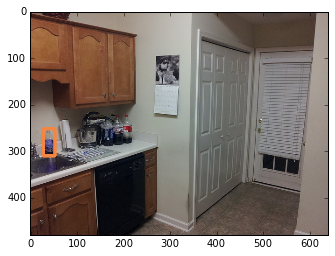

In [7]:
image = cv2.imread('train2017/' + image_obj['file_name'])
image = draw_boxes(image, boxes)
plt.imshow(image[..., ::-1])

In [8]:
def save_object(obj, filename):
    with open(filename, 'wb') as output:  # Overwrites any existing file.
        pickle.dump(obj, output, pickle.HIGHEST_PROTOCOL)

In [ ]:
images = {}
annotations = {}

times = []

count = 0
for e in data['annotations']:
    start = time()
    
    if count % 100 == 0:
        print('%f percent completed' % (count / len(data['annotations'])))
        if len(times) > 0.:
            print('average time %f' % (sum(times) / len(times)))
    
    image_index = find(data['images'], 'id', e['image_id'])
    image_obj = data['images'][image_index]
    image = cv2.imread('train2017/' + image_obj['file_name'])
    
    x, y, width, height = e['bbox']

    xmin = x
    xmax = x + width
    ymin = y
    ymax = y + height
    
    obj = {
        'name': e['category_id'],
        'xmin': xmin,
        'xmax': xmax,
        'ymin': ymin,
        'ymax': ymax
    }
    
    if (e['image_id'] in annotations.keys()):
        annotations[e['image_id']] += [obj]
    else:
        annotations[e['image_id']] = [obj]
        
    images[e['image_id']] = image
    
    times += [time() - start]
    count += 1
    
    
img_out = []
ann_out = []
    
for key, value in annotations.items():
    ann_out += [value]
    img_out += [images[key]]
    
save_object(img_out, 'all_images.pkl')
save_object(ann_out, 'all_annotations.pkl')

0.000000 percent completed
0.000116 percent completed
average time 0.009112
0.000233 percent completed
average time 0.009159
0.000349 percent completed
average time 0.008992
0.000465 percent completed
average time 0.008919
0.000581 percent completed
average time 0.008829


In [17]:
img_out = []
ann_out = []
    
for key, value in annotations.items():
    ann_out += [value]
    img_out += [images[key]]
    
save_object(img_out, 'all_images.pkl')
save_object(ann_out, 'all_annotations.pkl')